--------------------------------------------------------------------------------------------------------------------------

<h1 style="font-family:Open Sans; font-size:30px";><center> Trade Program Optimization - Advance Analytics </center></h1>

--------------------------------------------------------------------------------------------------------------------------

<p style="font-family:Open Sans";> To finetune customer targeting in order to leverage the effectiveness of the trade term program. To apply analytics model in order to uncover any hidden gaps in master data and trade term is the selected case for this study. The customer Trade Program Targeting Recommendation has the object to support the trade marketing to do the program to the right customers and effective, Moreover, we would:

<br>
    <p style="font-family:Open Sans";> • Improve the trade program targeting effectively 
<br> •	Increase the sell volume of customers & program performance as well
<br> •	Understand the customer’s behaviors & performance 
<br> •	Improve the master data and data model & what the need to push master data help the trade program targeting.

</p>    

<h1 style="font-family:Open Sans; font-size:20px";>Dependencies & Library </h1>
<hr>

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import datetime as datetime 

%matplotlib inline
#set bc seaborn as the defualt
#sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

# pivot-table-jsis a lightweight module that closely replicates the functionality of Excel and Google Sheets pivot tables. Used heavily in our internal suite of bespoke web apps that power our internal workflows, pivot-table-js allows you to apply aggregations to sets of values.
from pivottablejs import pivot_ui

<h1 style="font-family:Open Sans; font-size:20px";>Dataset Tranform & Load </h1>

In [2]:
#set full display all features
pd.set_option('display.max_columns', None)
target = pd.read_excel('dataset/target_customer.xlsx')
target.head(3)

,Agent_Code,Agent_Name,Outlet_Code,Outlet_Name,OutletNameEn,Region,Province,Account_Type,Status,Grade,City,District,Commune,Village,Cluster_Lead,Segment,Business_Org_Segment,Business_Segment,Category,ChannelName,OutletCreditStatus,AMS_HCAM_Premium_Brand,AMS_HCAM_Mainstream_Brand,AMS_Competitors_Premium_Brand,AMS_Competitors_Mainstream_Brand,OrderType,Document No_,DocType,ContractType,OrderCategory,ItemCode,Quantity,HL,amount1,Amount Including VAT,itm_code,itm_des,OUTLET_LATITUDE,OUTLET_LONGITUDE,level1_territory and Name,level2_territory and Name,level3_territory and Name,level4_territory and Name,Order Date,Posting Date,Posting Description,Shipment Date,Due Date,Document Date
0,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030444,Sale,Promo,Sale Transaction,10004510,54,4.2768,756.79,832.47,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-04,2023-02-04,Invoice B2B-CO230204-00127,2023-02-04,2023-02-04,2023-02-04
1,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030459,Sale,Promo,Sale Transaction,10004510,18,1.4256,252.26,277.49,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-06,2023-02-06,Invoice B2B-CO230206-00298,2023-02-06,2023-02-06,2023-02-06
2,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030489,Sale,Promo,Sale Transaction,10004510,36,2.8512,504.53,554.98,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-08,2023-02-08,Invoice SI-0025982,2023-02-08,2023-02-08,2023-02-08


In [4]:
#set full display all features
pd.set_option('display.max_columns', None)
population = pd.read_excel('dataset/population_customer.xlsx')
population.head(3)

,Agent_Code,Agent_Name,Outlet_Code,Outlet_Name,OutletNameEn,Region,Province,Account_Type,Status,Grade,City,District,Commune,Village,Cluster_Lead,Segment,Business_Org_Segment,Business_Segment,Category,ChannelName,OutletCreditStatus,AMS_HCAM_Premium_Brand,AMS_HCAM_Mainstream_Brand,AMS_Competitors_Premium_Brand,AMS_Competitors_Mainstream_Brand,OrderType,Document No_,DocType,ContractType,OrderCategory,ItemCode,Quantity,HL,amount1,Amount Including VAT,itm_code,itm_des,OUTLET_LATITUDE,OUTLET_LONGITUDE,level1_territory and Name,level2_territory and Name,level3_territory and Name,level4_territory and Name,Order Date,Posting Date,Posting Description,Shipment Date,Due Date,Document Date
0,10021186,Khun Nhor,74000124,មិត្តយើង ៩៩,MET YEUNG 99,East,Tboung Khmum,Outlet,Active,Grow,Suong,Ponhea Kraek,Kaong Kang,Stueng,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Silver,Restaurant / Tavern,No Credit,20.0,50.0,2.0,50.0,SO,KNM-0030558,Sale,Promo,Sale Transaction,10004510,12,0.9504,168.17,184.99,10004510,Tiger Crystal Pint 24x33cl ...,11.80797,105.85790,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-13,2023-02-13,Invoice SI-0026015,2023-02-13,2023-02-13,2023-02-13
1,10021186,Khun Nhor,74000179,អ៊ុំ សំអាន,AUM SAM AN,East,Tboung Khmum,Outlet,Active,Defend,Suong,Memot,Dar,Dar Phsar,Rural Traditional Off,Drink Shop,Traditional Trade,Off Trade,Gold,Liquor Store Unuse,Credit,20.0,200.0,30.0,500.0,SO,KNM-0031353,Sale,Promo,Sale Transaction,10004510,5,0.3960,84.09,92.50,10004510,Tiger Crystal Pint 24x33cl ...,11.79057,106.09623,RMKT_SUP3_R1-Ray Ron,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-03-23,2023-03-24,Invoice B2B-CO230323-01883,2023-03-23,2023-03-24,2023-03-24
2,10021186,Khun Nhor,74001768,ស្រី​ នាថ,SREY NEATH,East,Tboung Khmum,Outlet,Active,Grow,Suong,Ponhea Kraek,Trapeang Phlong,Trapeang Pring Ti Pir,Rural Traditional Off,Drink Shop,Traditional Trade,Off Trade,Silver,Liquor Store Unuse,No Credit,10.0,100.0,0.0,100.0,SO,KNM-0031130,Sale,Promo,Sale Transaction,10004510,3,0.2376,50.45,55.50,10004510,Tiger Crystal Pint 24x33cl ...,11.71304,105.96155,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-03-15,2023-03-16,Invoice B2B-CO230315-00622,2023-03-15,2023-03-16,2023-03-16


<h1 style="font-family:Open Sans; font-size:20px";>Data Wrangling & Cleansing</h1>
<hr>

In [5]:
#rename features

target.rename(columns={
    'Agent_Code':'agent_code',
    'Agent_Name' : 'agent_name',  
    'Outlet_Code':'outlet_code',
    'Outlet_Name':'outlet_name_kh',
    'OutletNameEn':'outlet_name_english',
    'Region': 'region',
    'Province':'province',
    'Account_Type':'account_type',
    'Status':'status',
    'Grade':'grade',
    'City':'city',
    'District':'district',
    'Commune':'commune',
    'Village':'village',
    'Cluster_Lead':'cluster_lead',
    'Segment':'segment',
    'Business_Org_Segment':'business_org_segment',
    'Business_Segment':'business_segment',
    'Category':'category',
    'ChannelName':'channel_name',
    'OutletCreditStatus':'outlet_credit_status',
    'AMS_HCAM_Premium_Brand':'ams_hcam_premium_brand',
    'AMS_HCAM_Mainstream_Brand':'ams_hcam_mainstream_brand',
    'AMS_Competitors_Premium_Brand':'ams_competitor_premium_brand',
    'AMS_Competitors_Mainstream_Brand':'ams_competitor_mainstream_brand',
    'OrderType':'order_type',  
    'Document No_':'document_number',
    'DocType':'document_type',  
    'ContractType':'contract_type',
    'OrderCategory':'order_category',
    'ItemCode':'item_code', 
    'Quantity':'quantity',   
    'HL':'hectoliter',  
    'amount1':'amount',  
    'Amount Including VAT':'gross_amount', 
    'itm_code':'item_code', 
    'itm_des':'item_name',
    'OUTLET_LATITUDE':'latitude',
    'OUTLET_LONGITUDE':'longitude',
    'level1_territory and Name':'sale_representative',
    'level2_territory and Name':'sale_supervisor',
    'level3_territory and Name':'sale_operation_manager',
    'level4_territory and Name':'channel_head',
    'Order Date':'order_date', 
    'Posting Date':'post_date',
    'Posting Description':'post_description',
    'Shipment Date':'shipment_date',
    'Due Date':'due_date',
    'Document Date':'document_date'
    
}, inplace=True)
target.tail(3)

,agent_code,agent_name,outlet_code,outlet_name_kh,outlet_name_english,region,province,account_type,status,grade,city,district,commune,village,cluster_lead,segment,business_org_segment,business_segment,category,channel_name,outlet_credit_status,ams_hcam_premium_brand,ams_hcam_mainstream_brand,ams_competitor_premium_brand,ams_competitor_mainstream_brand,order_type,document_number,document_type,contract_type,order_category,item_code,quantity,hectoliter,amount,gross_amount,item_code,item_name,latitude,longitude,sale_representative,sale_supervisor,sale_operation_manager,channel_head,order_date,post_date,post_description,shipment_date,due_date,document_date
5765,10332162,"PRIME DISTRIBUTORS ASIA CO., LTD.",79011912,ម៉កៈថៈបែបថៃ,MOOKATA BEB THAI,Central-1,Phnom Penh,Outlet,Active,Monitor,Phnom Penh,Russey Keo,Ruessei Kaev,Sameakki,Urban Traditional On,Soup & BBQ,Traditional Trade,On Trade,Bronze,On Trade,No Credit,NaN,NaN,NaN,NaN,SO,PDA-0035639,Sale,Promo,Sale Transaction,10003660,3,0.2376,38.86,42.75,10003660,Tiger Pint 24x33cl ...,11.58517,104.90273,UNPP_SUP1_R1-Chanviden Chan,UNPP_SUP1-Mesa Koeut,UNPP_SOM-Sokha Heang,UN_CH-Shereen Teh,2023-02-28,2023-02-28,Invoice B2B-CO230228-00645,2023-02-28,2023-02-28,2023-02-28
5766,10332162,"PRIME DISTRIBUTORS ASIA CO., LTD.",79011912,ម៉កៈថៈបែបថៃ,MOOKATA BEB THAI,Central-1,Phnom Penh,Outlet,Active,Monitor,Phnom Penh,Russey Keo,Ruessei Kaev,Sameakki,Urban Traditional On,Soup & BBQ,Traditional Trade,On Trade,Bronze,On Trade,No Credit,NaN,NaN,NaN,NaN,SO,PDA-0035639,Sale,Promo,Sale Transaction,10004510,3,0.2376,42.05,46.25,10004510,Tiger Crystal Pint 24x33cl ...,11.58517,104.90273,UNPP_SUP1_R1-Chanviden Chan,UNPP_SUP1-Mesa Koeut,UNPP_SOM-Sokha Heang,UN_CH-Shereen Teh,2023-02-28,2023-02-28,Invoice B2B-CO230228-00645,2023-02-28,2023-02-28,2023-02-28
5767,10332162,"PRIME DISTRIBUTORS ASIA CO., LTD.",79011912,ម៉កៈថៈបែបថៃ,MOOKATA BEB THAI,Central-1,Phnom Penh,Outlet,Active,Monitor,Phnom Penh,Russey Keo,Ruessei Kaev,Sameakki,Urban Traditional On,Soup & BBQ,Traditional Trade,On Trade,Bronze,On Trade,No Credit,NaN,NaN,NaN,NaN,SO,PDA-0036412,Sale,Promo,Sale Transaction,10004510,10,0.7920,140.15,154.16,10004510,Tiger Crystal Pint 24x33cl ...,11.58517,104.90273,UNPP_SUP1_R1-Chanviden Chan,UNPP_SUP1-Mesa Koeut,UNPP_SOM-Sokha Heang,UN_CH-Shereen Teh,2023-03-06,2023-03-06,Invoice B2B-CO230306-00701,2023-03-06,2023-03-06,2023-03-06


In [6]:
#rename features

population.rename(columns={
    'Agent_Code':'agent_code',
    'Agent_Name' : 'agent_name',  
    'Outlet_Code':'outlet_code',
    'Outlet_Name':'outlet_name_kh',
    'OutletNameEn':'outlet_name_english',
    'Region': 'region',
    'Province':'province',
    'Account_Type':'account_type',
    'Status':'status',
    'Grade':'grade',
    'City':'city',
    'District':'district',
    'Commune':'commune',
    'Village':'village',
    'Cluster_Lead':'cluster_lead',
    'Segment':'segment',
    'Business_Org_Segment':'business_org_segment',
    'Business_Segment':'business_segment',
    'Category':'category',
    'ChannelName':'channel_name',
    'OutletCreditStatus':'outlet_credit_status',
    'AMS_HCAM_Premium_Brand':'ams_hcam_premium_brand',
    'AMS_HCAM_Mainstream_Brand':'ams_hcam_mainstream_brand',
    'AMS_Competitors_Premium_Brand':'ams_competitor_premium_brand',
    'AMS_Competitors_Mainstream_Brand':'ams_competitor_mainstream_brand',
    'OrderType':'order_type',  
    'Document No_':'document_number',
    'DocType':'document_type',  
    'ContractType':'contract_type',
    'OrderCategory':'order_category',
    'ItemCode':'item_code', 
    'Quantity':'quantity',   
    'HL':'hectoliter',  
    'amount1':'amount',  
    'Amount Including VAT':'gross_amount', 
    'itm_code':'item_code', 
    'itm_des':'item_name',
    'OUTLET_LATITUDE':'latitude',
    'OUTLET_LONGITUDE':'longitude',
    'level1_territory and Name':'sale_representative',
    'level2_territory and Name':'sale_supervisor',
    'level3_territory and Name':'sale_operation_manager',
    'level4_territory and Name':'channel_head',
    'Order Date':'order_date', 
    'Posting Date':'post_date',
    'Posting Description':'post_description',
    'Shipment Date':'shipment_date',
    'Due Date':'due_date',
    'Document Date':'document_date'
    
}, inplace=True)
population.tail(3)

,agent_code,agent_name,outlet_code,outlet_name_kh,outlet_name_english,region,province,account_type,status,grade,city,district,commune,village,cluster_lead,segment,business_org_segment,business_segment,category,channel_name,outlet_credit_status,ams_hcam_premium_brand,ams_hcam_mainstream_brand,ams_competitor_premium_brand,ams_competitor_mainstream_brand,order_type,document_number,document_type,contract_type,order_category,item_code,quantity,hectoliter,amount,gross_amount,item_code,item_name,latitude,longitude,sale_representative,sale_supervisor,sale_operation_manager,channel_head,order_date,post_date,post_description,shipment_date,due_date,document_date
8013,10332162,"PRIME DISTRIBUTORS ASIA CO., LTD.",79031773,ប៊េមប៊ូផាប់,BAMBOO PUB,Central-1,Phnom Penh,Outlet,Active,NaN,Phnom Penh,Tuol Kouk,Tuek L'ak Ti Pir,Phum 2,NaN,PUB,Modern Trade,On Trade,NaN,On Trade,No Credit,80.0,NaN,50.0,40.0,SO,PDA-0036387,Sale,Promo,Sale Transaction,10004510,2,0.1584,33.64,37.0,10004510,Tiger Crystal Pint 24x33cl ...,NaN,NaN,UNPP_SUP1_R4-TithPanha Top,UNPP_SUP1-Mesa Koeut,UNPP_SOM-Sokha Heang,UN_CH-Shereen Teh,2023-03-06,2023-03-06,Invoice B2B-CO230306-00516,2023-03-06,2023-03-06,2023-03-06
8014,10332162,"PRIME DISTRIBUTORS ASIA CO., LTD.",79031773,ប៊េមប៊ូផាប់,BAMBOO PUB,Central-1,Phnom Penh,Outlet,Active,NaN,Phnom Penh,Tuol Kouk,Tuek L'ak Ti Pir,Phum 2,NaN,PUB,Modern Trade,On Trade,NaN,On Trade,No Credit,80.0,NaN,50.0,40.0,SO,PDA-0037041,Sale,Promo,Sale Transaction,10003660,2,0.1584,31.09,34.2,10003660,Tiger Pint 24x33cl ...,NaN,NaN,UNPP_SUP1_R4-TithPanha Top,UNPP_SUP1-Mesa Koeut,UNPP_SOM-Sokha Heang,UN_CH-Shereen Teh,2023-03-08,2023-03-08,Invoice B2B-CO230308-00309,2023-03-08,2023-03-08,2023-03-08
8015,10332162,"PRIME DISTRIBUTORS ASIA CO., LTD.",79031773,ប៊េមប៊ូផាប់,BAMBOO PUB,Central-1,Phnom Penh,Outlet,Active,NaN,Phnom Penh,Tuol Kouk,Tuek L'ak Ti Pir,Phum 2,NaN,PUB,Modern Trade,On Trade,NaN,On Trade,No Credit,80.0,NaN,50.0,40.0,SO,PDA-0038193,Sale,Promo,Sale Transaction,10004510,5,0.3960,84.09,92.5,10004510,Tiger Crystal Pint 24x33cl ...,NaN,NaN,UNPP_SUP1_R4-TithPanha Top,UNPP_SUP1-Mesa Koeut,UNPP_SOM-Sokha Heang,UN_CH-Shereen Teh,2023-03-17,2023-03-17,Invoice B2B-CO230317-00078,2023-03-17,2023-03-17,2023-03-17


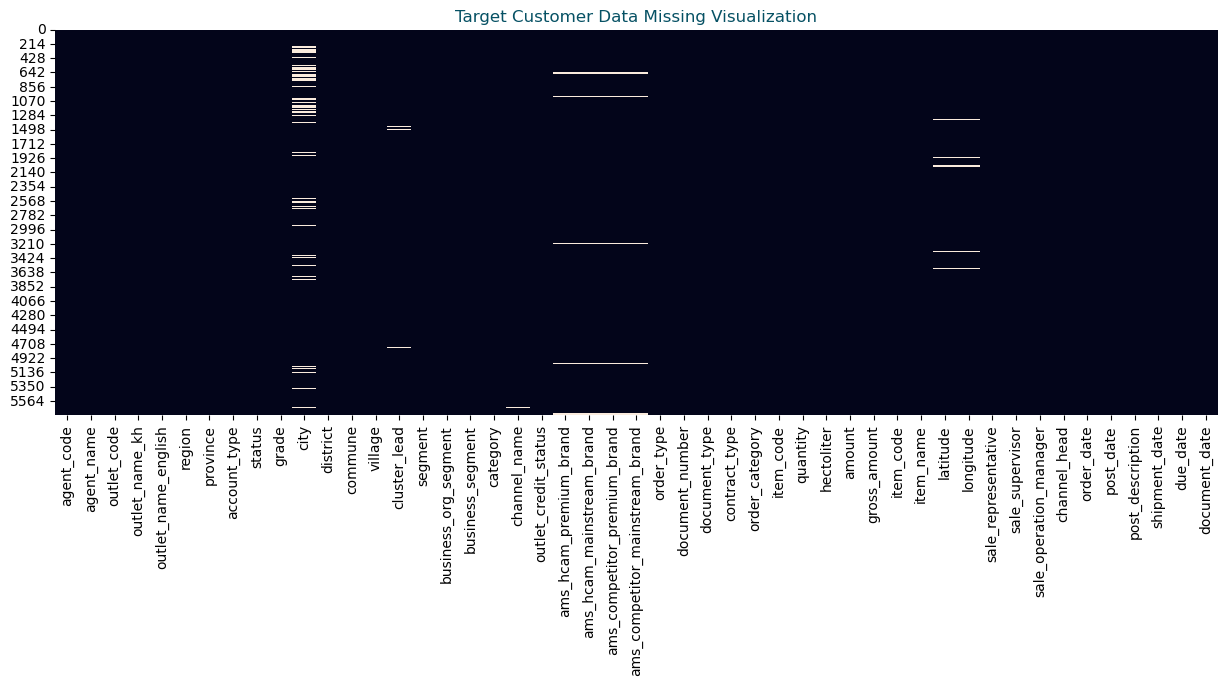

In [7]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(target.isnull(), cbar=False)
plt.title('Target Customer Data Missing Visualization',fontsize='12', color='#065164')
#plt.xticks(rotation='80')
plt.show()

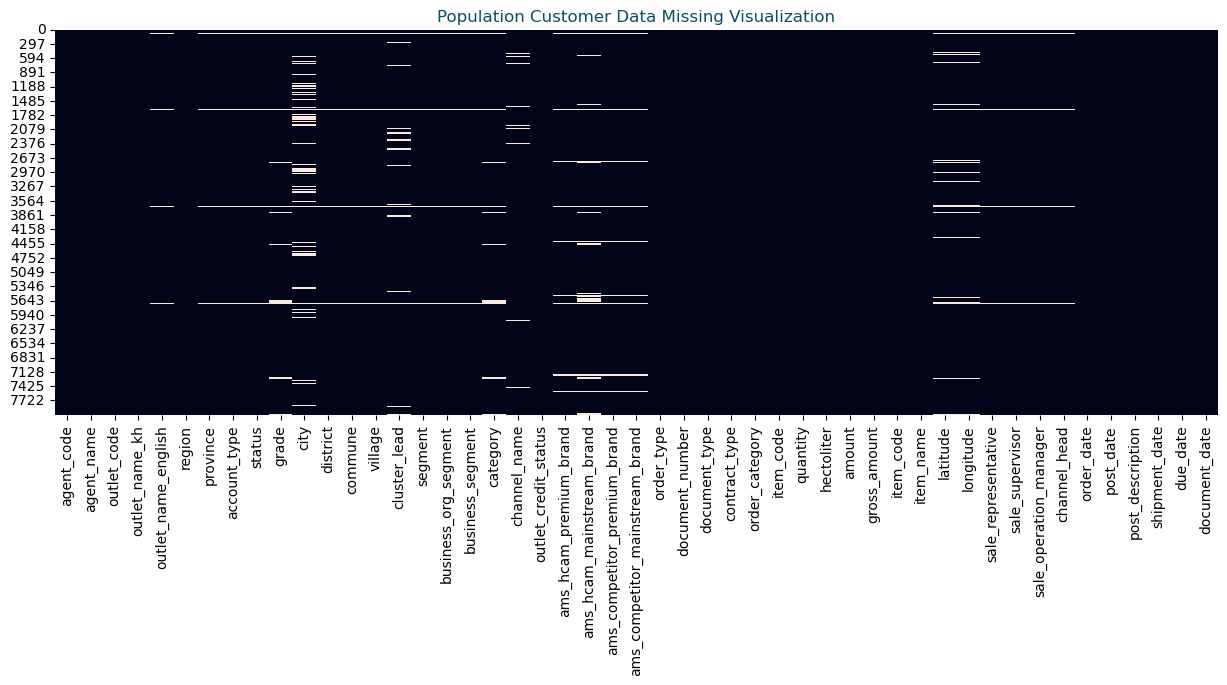

In [8]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(population.isnull(), cbar=False)
plt.title('Population Customer Data Missing Visualization',fontsize='12', color='#065164')
#plt.xticks(rotation='80')
plt.show()

In [9]:
#check data type in each features of dataset

target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       5768 non-null   int64         
 1   agent_name                       5768 non-null   object        
 2   outlet_code                      5768 non-null   int64         
 3   outlet_name_kh                   5768 non-null   object        
 4   outlet_name_english              5768 non-null   object        
 5   region                           5768 non-null   object        
 6   province                         5768 non-null   object        
 7   account_type                     5768 non-null   object        
 8   status                           5768 non-null   object        
 9   grade                            5764 non-null   object        
 10  city                             5014 non-null   object     

In [10]:
#check data type in each features of dataset

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       8016 non-null   int64         
 1   agent_name                       8016 non-null   object        
 2   outlet_code                      8016 non-null   int64         
 3   outlet_name_kh                   8016 non-null   object        
 4   outlet_name_english              7939 non-null   object        
 5   region                           8016 non-null   object        
 6   province                         7936 non-null   object        
 7   account_type                     7936 non-null   object        
 8   status                           7936 non-null   object        
 9   grade                            7775 non-null   object        
 10  city                             6920 non-null   object     

In [11]:
#number of observation and features - target 

print("Number Of Dimension:", target.shape[1])
print("Number Of Samples:", target.shape[0])

print("*" * 100)

#number of observation and features -- population 
print("Number Of Dimension:", population.shape[1])
print("Number Of Samples:", population.shape[0])

Number Of Dimension: 49
Number Of Samples: 5768
****************************************************************************************************
Number Of Dimension: 49
Number Of Samples: 8016


In [12]:
#check missing value if there are any missing data.
target_missing_value = target.isnull().sum()
percent_target_missing_value = target_missing_value / len(target)
print("*" * 100)
print("Missing Value:\n", target_missing_value)
print("*" * 100)
print("Pecent of Missing Value:\n", percent_target_missing_value)

****************************************************************************************************
Missing Value:
 agent_code                           0
agent_name                           0
outlet_code                          0
outlet_name_kh                       0
outlet_name_english                  0
region                               0
province                             0
account_type                         0
status                               0
grade                                4
city                               754
district                             0
commune                              0
village                              0
cluster_lead                        42
segment                              0
business_org_segment                 0
business_segment                     0
category                             4
channel_name                         6
outlet_credit_status                 0
ams_hcam_premium_brand             130
ams_hcam_mainstream_brand

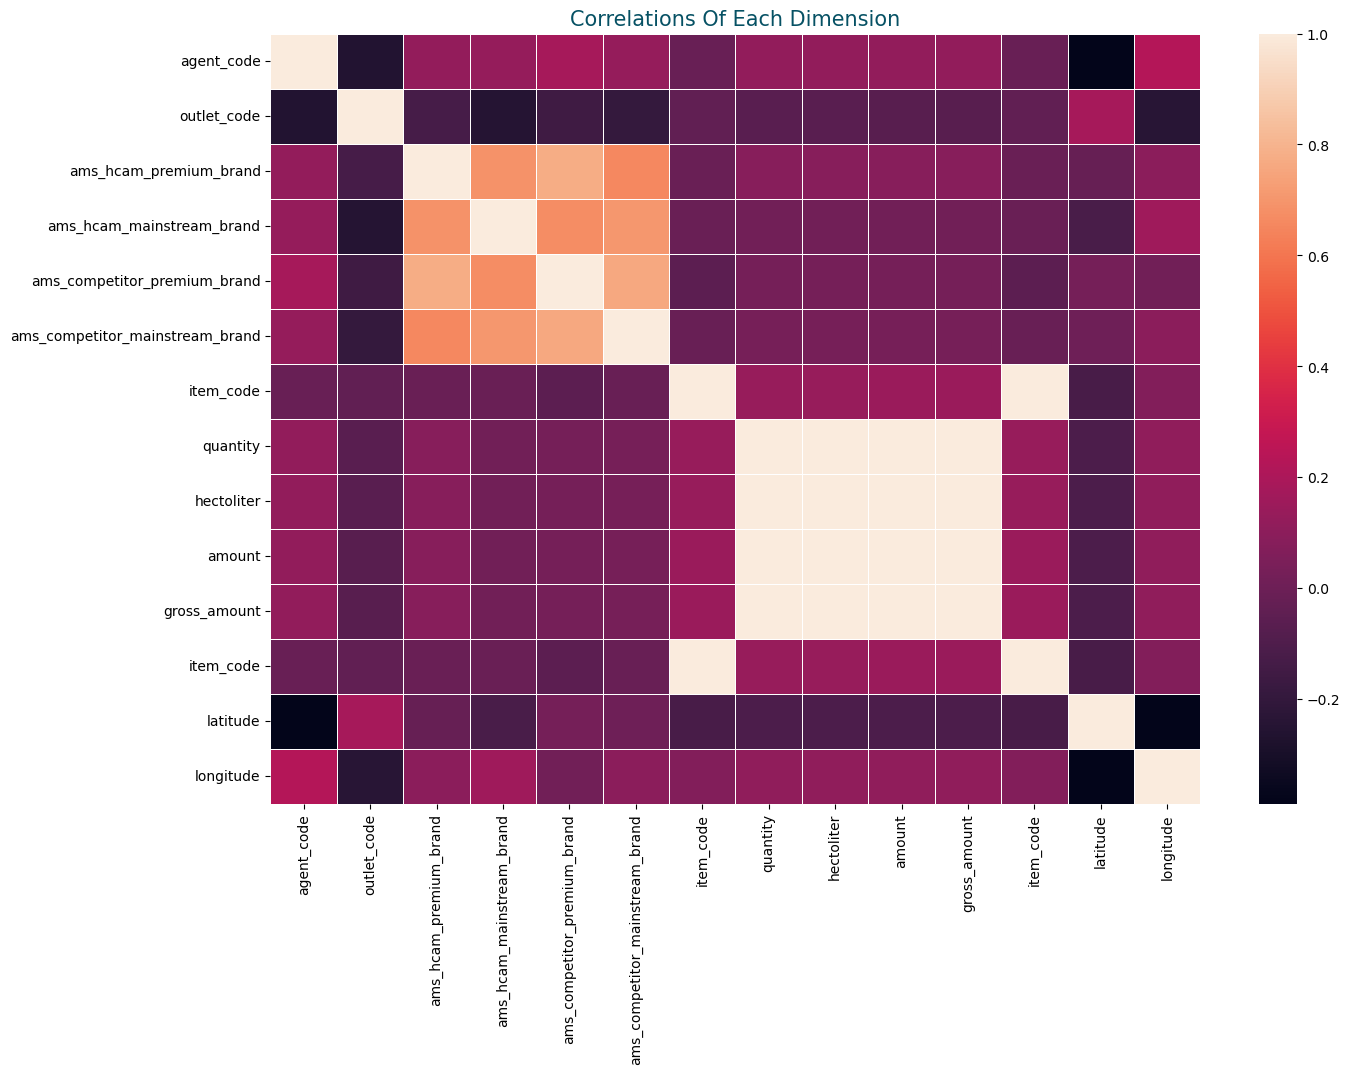

,agent_code,outlet_code,ams_hcam_premium_brand,ams_hcam_mainstream_brand,ams_competitor_premium_brand,ams_competitor_mainstream_brand,item_code,quantity,hectoliter,amount,gross_amount,item_code,latitude,longitude
count,5.768000e+03,5.768000e+03,5638.000000,5637.000000,5638.000000,5638.000000,5.768000e+03,5768.000000,5768.000000,5768.000000,5768.000000,5.768000e+03,5705.000000,5705.000000
mean,1.015336e+07,7.526842e+07,54.175949,107.403938,20.747251,43.862895,1.000422e+07,19.124653,1.514673,262.652077,288.917098,1.000422e+07,11.789578,104.550640
std,1.303005e+05,3.274835e+06,91.014682,143.236059,36.266837,66.792859,4.037137e+02,37.729250,2.988157,524.224745,576.647371,4.037137e+02,0.837619,0.753306
min,1.002119e+07,7.100002e+07,0.000000,0.000000,0.000000,0.000000,1.000366e+07,-500.000000,-39.600000,-6477.010000,-7124.710000,1.000366e+07,10.428990,102.366120
25%,1.002120e+07,7.131879e+07,10.000000,30.000000,2.000000,10.000000,1.000366e+07,5.000000,0.396000,70.070000,77.080000,1.000366e+07,11.479660,104.168050
50%,1.015752e+07,7.610317e+07,30.000000,65.000000,10.000000,30.000000,1.000451e+07,6.000000,0.475200,84.090000,92.500000,1.000451e+07,11.560650,104.890760
75%,1.029058e+07,7.802227e+07,50.000000,130.000000,25.000000,50.000000,1.000451e+07,20.000000,1.584000,259.080000,284.990000,1.000451e+07,11.914800,104.927760
max,1.033216e+07,7.901939e+07,700.000000,1190.000000,300.000000,600.000000,1.000451e+07,1200.000000,95.040000,16817.510000,18499.260000,1.000451e+07,14.248330,107.199580


In [13]:
#Descriptive Statistic

target_correlations = target.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(target_correlations, 
           xticklabels=target_correlations.columns.values,
           yticklabels=target_correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations Of Each Dimension', fontsize='15', color='#065164')
plt.show()

target.describe()
#data.describe(include='all')

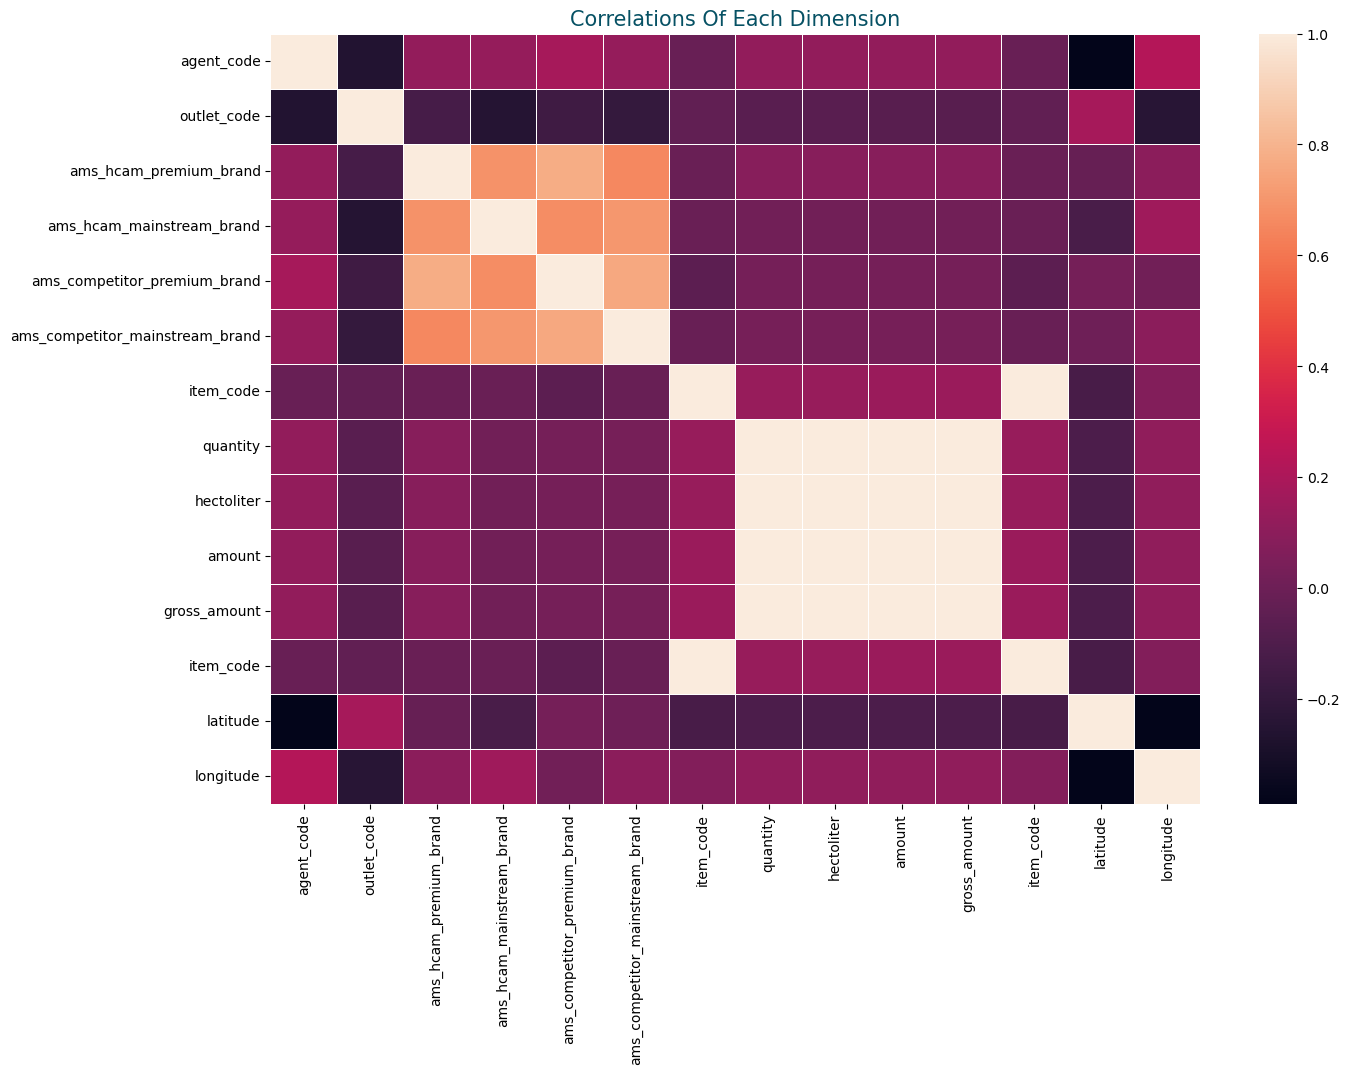

,agent_code,outlet_code,ams_hcam_premium_brand,ams_hcam_mainstream_brand,ams_competitor_premium_brand,ams_competitor_mainstream_brand,item_code,quantity,hectoliter,amount,gross_amount,item_code,latitude,longitude
count,8.016000e+03,8.016000e+03,7803.000000,7457.000000,7803.000000,7803.000000,8.016000e+03,8016.000000,8016.000000,8016.000000,8016.000000,8.016000e+03,7696.000000,7696.000000
mean,1.011804e+07,7.575009e+07,80.186595,189.551160,37.573369,153.295271,1.000420e+07,13.374127,1.059231,188.332033,207.171598,1.000420e+07,12.069124,104.550852
std,1.228970e+05,3.273300e+06,181.593117,480.821589,91.894218,471.917159,4.092162e+02,30.282107,2.398343,418.221026,460.040333,4.092162e+02,1.183605,3.303451
min,1.002119e+07,1.002122e+07,0.000000,0.000000,0.000000,0.000000,1.000366e+07,-68.000000,-5.385600,-1057.090000,-1162.800000,1.000366e+07,0.000000,0.000000
25%,1.002120e+07,7.300392e+07,10.000000,30.000000,2.000000,10.000000,1.000366e+07,2.000000,0.158400,33.640000,37.000000,1.000366e+07,11.539030,103.862640
50%,1.002121e+07,7.610347e+07,25.000000,60.000000,10.000000,30.000000,1.000451e+07,5.000000,0.396000,77.730000,85.500000,1.000451e+07,11.581020,104.900590
75%,1.029058e+07,7.802370e+07,60.000000,160.000000,30.000000,100.000000,1.000451e+07,10.000000,0.792000,168.170000,184.990000,1.000451e+07,12.854090,104.947707
max,1.033216e+07,7.903220e+07,3020.000000,10520.000000,800.000000,12000.000000,1.000451e+07,500.000000,39.600000,7007.290000,7708.020000,1.000451e+07,41.859240,111.000000


In [14]:
#Descriptive Statistic

population_correlations = population.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(target_correlations, 
           xticklabels=population_correlations.columns.values,
           yticklabels=population_correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations Of Each Dimension', fontsize='15', color='#065164')
plt.show()

population.describe()
#data.describe(include='all')

In [15]:
#convert the float values from negative to positive 

target['quantity'] = target['quantity'].abs()
target['hectoliter'] = target['hectoliter'].abs()
target['quantity'] = target['amount'].abs()
target['quantity'] = target['gross_amount'].abs()

population['quantity'] = population['quantity'].abs()
population['hectoliter'] = population['hectoliter'].abs()
population['quantity'] = population['amount'].abs()
population['quantity'] = population['gross_amount'].abs()

<h1 style="font-family:Open Sans; font-size:30px";><center>TPO - Advance Analytics </center></h1>

<h1 style="font-family:Open Sans; font-size:25px";><center>Data Preprocessing</center></h1>

In [16]:
target.head()

,agent_code,agent_name,outlet_code,outlet_name_kh,outlet_name_english,region,province,account_type,status,grade,city,district,commune,village,cluster_lead,segment,business_org_segment,business_segment,category,channel_name,outlet_credit_status,ams_hcam_premium_brand,ams_hcam_mainstream_brand,ams_competitor_premium_brand,ams_competitor_mainstream_brand,order_type,document_number,document_type,contract_type,order_category,item_code,quantity,hectoliter,amount,gross_amount,item_code,item_name,latitude,longitude,sale_representative,sale_supervisor,sale_operation_manager,channel_head,order_date,post_date,post_description,shipment_date,due_date,document_date
0,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030444,Sale,Promo,Sale Transaction,10004510,832.47,4.2768,756.79,832.47,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-04,2023-02-04,Invoice B2B-CO230204-00127,2023-02-04,2023-02-04,2023-02-04
1,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030459,Sale,Promo,Sale Transaction,10004510,277.49,1.4256,252.26,277.49,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-06,2023-02-06,Invoice B2B-CO230206-00298,2023-02-06,2023-02-06,2023-02-06
2,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030489,Sale,Promo,Sale Transaction,10004510,554.98,2.8512,504.53,554.98,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-08,2023-02-08,Invoice SI-0025982,2023-02-08,2023-02-08,2023-02-08
3,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030534,Sale,Promo,Sale Transaction,10004510,92.50,0.4752,84.09,92.50,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-10,2023-02-10,Invoice B2B-CO230210-00126,2023-02-10,2023-02-10,2023-02-10
4,10021186,Khun Nhor,74000170,តាំង​ ឡាយ,TAING LAY,East,Tboung Khmum,Outlet,Active,Defend,Suong,Ponhea Kraek,Kraek,Kraek Tboung,Rural Traditional On,Soup & BBQ,Traditional Trade,On Trade,Gold,Restaurant / Tavern,No Credit,100.0,100.0,10.0,30.0,SO,KNM-0030567,Sale,Promo,Sale Transaction,10004510,554.98,2.8512,504.53,554.98,10004510,Tiger Crystal Pint 24x33cl ...,11.77254,105.92761,RMKT_SUP3_R4-Menghour Chor,RMKT_SUP3-Simly Sin,RMKT_SOM-Kosol Som,RM_CH-Sotheavy Heng,2023-02-13,2023-02-13,Invoice B2B-CO230213-00234,2023-02-13,2023-02-13,2023-02-13


In [17]:
#feature engineering 
#aa_data = target['hectoliter', 'gross_amount', 'latitude', 'longitude']
aa_data = target.loc[:, ['hectoliter', 'gross_amount', 'grade', 'segment', 'province']]
aa_data = aa_data[aa_data['hectoliter'] > 0]
aa_data = aa_data[aa_data['gross_amount'] > 0]

In [18]:
#check info
aa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5690 entries, 0 to 5767
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hectoliter    5690 non-null   float64
 1   gross_amount  5690 non-null   float64
 2   grade         5686 non-null   object 
 3   segment       5690 non-null   object 
 4   province      5690 non-null   object 
dtypes: float64(2), object(3)
memory usage: 266.7+ KB


In [19]:
#drop null values 
aa_data.dropna(inplace=True)

In [20]:
#convert the data into the numpy array 
data_array = aa_data.values
data_array

array([[4.2768, 832.47, 'Defend', 'Soup & BBQ', 'Tboung Khmum'],
       [1.4256, 277.49, 'Defend', 'Soup & BBQ', 'Tboung Khmum'],
       [2.8512, 554.98, 'Defend', 'Soup & BBQ', 'Tboung Khmum'],
       ...,
       [0.2376, 42.75, 'Monitor', 'Soup & BBQ', 'Phnom Penh'],
       [0.2376, 46.25, 'Monitor', 'Soup & BBQ', 'Phnom Penh'],
       [0.792, 154.16, 'Monitor', 'Soup & BBQ', 'Phnom Penh']],
      dtype=object)

In [21]:
#apply one hot encoding 
aa_data = pd.get_dummies(aa_data, columns = ['grade', 'segment', 'province'])
aa_data.tail()

,hectoliter,gross_amount,grade_Attack,grade_Defend,grade_Grow,grade_Monitor,segment_Beer Garden,segment_Chinese Restaurant,segment_Club,segment_Guest House,segment_Hotel 3-5 Star,segment_PUB,segment_Premium KTV,segment_Premium Restaurant,segment_Regular Bar,segment_Regular KTV,segment_Regular Restaurant,segment_Soup & BBQ,province_Banteay Meanchey,province_Battambang,province_Kampong Cham,province_Kampong Chhnang,province_Kampong Speu,province_Kampong Thom,province_Kampot,province_Kandal,province_Kep,province_Koh Kong,province_Kratie,province_Mondulkiri,province_Oddar Meanchey,province_Pailin,province_Phnom Penh,province_Preah Sihanouk,province_Preah Vihear,province_Prey Veng,province_Pursat,province_Ratanakiri,province_Siem Reap,province_Stung Treng,province_Svay Rieng,province_Takeo,province_Tboung Khmum
5763,0.7920,142.49,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5764,0.3960,77.08,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5765,0.2376,42.75,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5766,0.2376,46.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5767,0.7920,154.16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<h1 style="font-family:Open Sans; font-size:25px";><center>K-Mode Model Training</center></h1>

In [26]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn import preprocessing
from sklearn.decomposition import PCA

pd.set_option('mode.chained_assignment', None)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26190.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 462, cost: 24147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1036, cost: 22043.0
Run 1, iteration: 2/100, moves: 423, cost: 22043.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1156, cost: 20852.0
Run 1, iteration: 2/100, moves: 206, cost: 20852.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1048, cost: 20362.0
Run 1, iteration: 2/100, moves: 61, cost: 20362.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1402, cost: 19187.0
Run 1, iteration: 2/100, moves: 253, cost: 19187.0
Init: ini

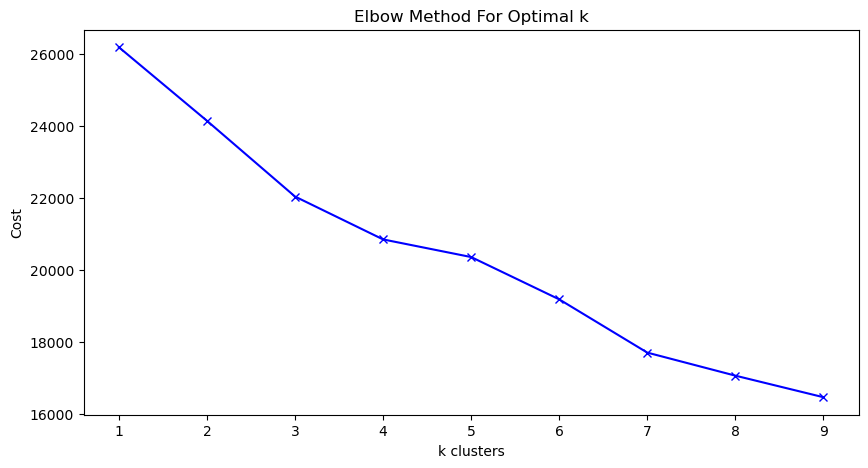

In [27]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(aa_data)
    cost.append(kmode.cost_)

plt.figure(figsize=(10,5))
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
km = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(aa_data)
aa_data['cluster'] = cluster_labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1036, cost: 22043.0
Run 1, iteration: 2/100, moves: 423, cost: 22043.0


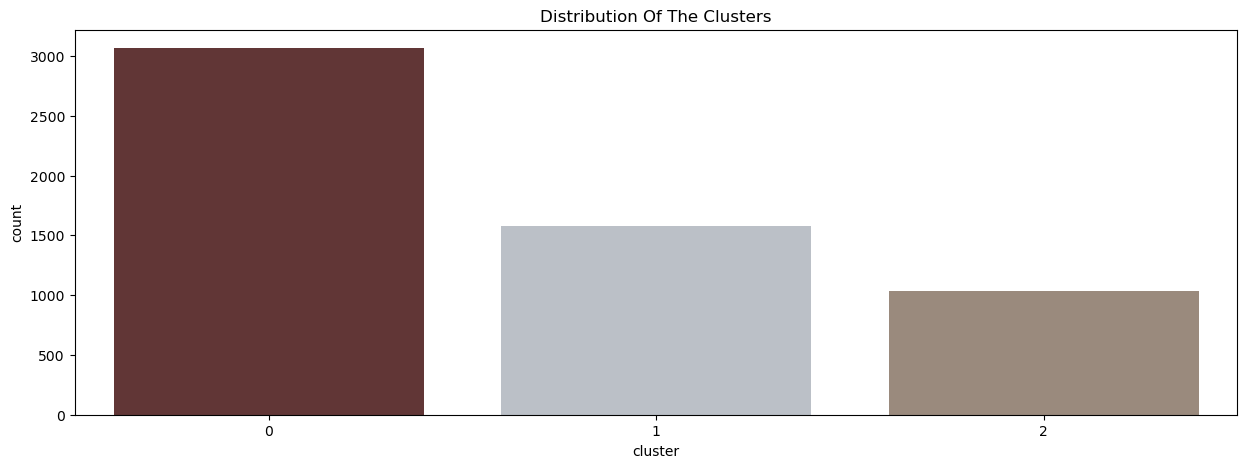

In [29]:
plt.figure(figsize=(15,5))

#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=aa_data["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<h1 style="font-family:Open Sans; font-size:25px";><center>K-Mode Model Evaluation</center></h1>

In [30]:
#Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique.
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n=2): {silhouette_score(aa_data, cluster_labels)}')

Silhouette Score(n=2): -0.12154193081662465
